In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Before applying new thermal paste
#df = pd.read_csv("CT-Log 2021-10-14 11-26-56.csv", skiprows=[i for i in range(0,9)], skipfooter = 2, header=None)

# After applying new thermal paste
df = pd.read_csv("CT-Log 2021-11-20 17-49-52.csv", skiprows=[i for i in range(0,9)], skipfooter = 2, header=None)

C:\Users\Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,17:50:02 11/20/21,12,12,12,12,12,12,12,12,NaN,...,10,19,0,1516.66,NaN,10,19,0,1516.66,NaN
1,17:50:12 11/20/21,10,10,10,10,10,10,10,10,NaN,...,9,19,1,3141.65,NaN,9,19,1,3141.65,NaN
2,17:50:22 11/20/21,9,9,9,9,9,9,9,9,NaN,...,9,19,0,3141.65,NaN,9,19,1,3141.65,NaN
3,17:50:32 11/20/21,10,10,10,10,10,10,10,10,NaN,...,9,19,0,3141.65,NaN,9,19,1,3141.65,NaN
4,17:50:42 11/20/21,10,10,10,10,10,10,10,10,NaN,...,9,19,0,3141.65,NaN,9,19,1,3141.65,NaN


In [4]:
df.shape

(1680, 51)

In [5]:
df = df.rename(columns={0:"Time",
                        1:"Core 0 Temp",
                        2:"Core 1 Temp",
                        3:"Core 2 Temp",
                        4:"Core 3 Temp",
                        5:"Core 4 Temp",
                        6:"Core 5 Temp",
                        7:"Core 6 Temp",
                        8:"Core 7 Temp",
                        13:"Core 0 Load",
                        14:"Core 0 Speed",
                        18:"Core 1 Load",
                        19:"Core 1 Speed",
                        23:"Core 2 Load",
                        24:"Core 2 Speed",
                        28:"Core 3 Load",
                        29:"Core 3 Speed",
                        33:"Core 4 Load",
                        34:"Core 4 Speed",
                        38:"Core 5 Load",
                        39:"Core 5 Speed",
                        43:"Core 6 Load",
                        44:"Core 6 Speed",
                        48:"Core 7 Load",
                        49:"Core 7 Speed"})

df = df.drop([9,10,11,12,15,16,17,20,21,22,25,26,27,30,31,32,35,36,37,40,41,42,45,46,47,50], axis=1)

In [6]:
df.head()

,Time,Core 0 Temp,Core 1 Temp,Core 2 Temp,Core 3 Temp,Core 4 Temp,Core 5 Temp,Core 6 Temp,Core 7 Temp,Core 0 Load,...,Core 3 Load,Core 3 Speed,Core 4 Load,Core 4 Speed,Core 5 Load,Core 5 Speed,Core 6 Load,Core 6 Speed,Core 7 Load,Core 7 Speed
0,17:50:02 11/20/21,12,12,12,12,12,12,12,12,11,...,6,1516.66,0,1516.66,0,1516.66,0,1516.66,0,1516.66
1,17:50:12 11/20/21,10,10,10,10,10,10,10,10,5,...,4,3141.65,4,3141.65,1,3141.65,1,3141.65,1,3141.65
2,17:50:22 11/20/21,9,9,9,9,9,9,9,9,6,...,0,3141.65,0,3141.65,0,3141.65,0,3141.65,1,3141.65
3,17:50:32 11/20/21,10,10,10,10,10,10,10,10,8,...,0,3141.65,0,3141.65,0,3141.65,0,3141.65,1,3141.65
4,17:50:42 11/20/21,10,10,10,10,10,10,10,10,7,...,7,3141.65,0,3141.65,0,3141.65,0,3141.65,1,3141.65


In [7]:
df.tail()

,Time,Core 0 Temp,Core 1 Temp,Core 2 Temp,Core 3 Temp,Core 4 Temp,Core 5 Temp,Core 6 Temp,Core 7 Temp,Core 0 Load,...,Core 3 Load,Core 3 Speed,Core 4 Load,Core 4 Speed,Core 5 Load,Core 5 Speed,Core 6 Load,Core 6 Speed,Core 7 Load,Core 7 Speed
1675,22:29:14 11/20/21,11,11,11,11,11,11,11,11,10,...,4,1516.66,1,1516.66,1,1516.66,1,1516.66,1,1516.66
1676,22:29:24 11/20/21,11,11,11,11,11,11,11,11,11,...,1,1516.66,0,1516.66,0,1516.66,0,1516.66,0,1516.66
1677,22:29:34 11/20/21,11,11,11,11,11,11,11,11,15,...,5,1516.66,0,1516.66,0,1516.66,0,1516.66,0,1516.66
1678,22:29:44 11/20/21,15,15,15,15,15,15,15,15,13,...,14,3141.65,10,3141.65,2,3141.65,0,3141.65,0,3141.65
1679,22:29:54 11/20/21,11,11,11,11,11,11,11,11,15,...,7,1516.66,7,1516.66,6,1516.66,0,1516.66,0,1516.66


In [8]:
df.shape

(1680, 25)

In [9]:
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S %m/%d/%y')
df.dtypes

Time            datetime64[ns]
Core 0 Temp              int64
Core 1 Temp              int64
Core 2 Temp              int64
Core 3 Temp              int64
Core 4 Temp              int64
Core 5 Temp              int64
Core 6 Temp              int64
Core 7 Temp              int64
Core 0 Load              int64
Core 0 Speed           float64
Core 1 Load              int64
Core 1 Speed           float64
Core 2 Load              int64
Core 2 Speed           float64
Core 3 Load              int64
Core 3 Speed           float64
Core 4 Load              int64
Core 4 Speed           float64
Core 5 Load              int64
Core 5 Speed           float64
Core 6 Load              int64
Core 6 Speed           float64
Core 7 Load              int64
Core 7 Speed           float64
dtype: object

In [10]:
df.describe()

,Core 0 Temp,Core 1 Temp,Core 2 Temp,Core 3 Temp,Core 4 Temp,Core 5 Temp,Core 6 Temp,Core 7 Temp,Core 0 Load,Core 0 Speed,...,Core 3 Load,Core 3 Speed,Core 4 Load,Core 4 Speed,Core 5 Load,Core 5 Speed,Core 6 Load,Core 6 Speed,Core 7 Load,Core 7 Speed
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,17.088690,17.078571,17.083929,17.084524,17.083333,17.084524,17.083929,17.084524,21.235714,2226.819161,...,15.971429,2249.839833,13.225595,2251.193994,9.544643,2256.804083,6.210714,2256.223732,6.801786,2262.414173
std,6.737121,6.727471,6.735855,6.736246,6.735553,6.736600,6.736386,6.736423,14.729134,790.425895,...,15.114387,791.162240,16.118004,791.535374,13.371288,792.544585,12.533111,792.729467,12.786304,793.512827
min,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1516.660000,...,0.000000,1516.660000,0.000000,1516.660000,0.000000,1516.660000,0.000000,1516.660000,0.000000,1516.660000
25%,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,1516.660000,...,4.000000,1516.660000,0.000000,1516.660000,0.000000,1516.660000,0.000000,1516.660000,0.000000,1516.660000
50%,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,18.000000,1516.660000,...,12.000000,1516.660000,6.000000,1516.660000,3.000000,1516.660000,1.000000,1516.660000,1.000000,1516.660000
75%,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,30.000000,3141.650000,...,25.000000,3141.650000,24.000000,3141.650000,16.000000,3141.650000,7.000000,3141.650000,8.250000,3141.650000
max,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,92.000000,3141.650000,...,92.000000,3141.650000,91.000000,3141.650000,91.000000,3141.650000,91.000000,3141.650000,95.000000,3141.650000


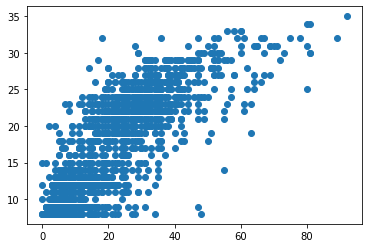

In [11]:
plt.scatter(df['Core 0 Load'],df['Core 0 Temp'])

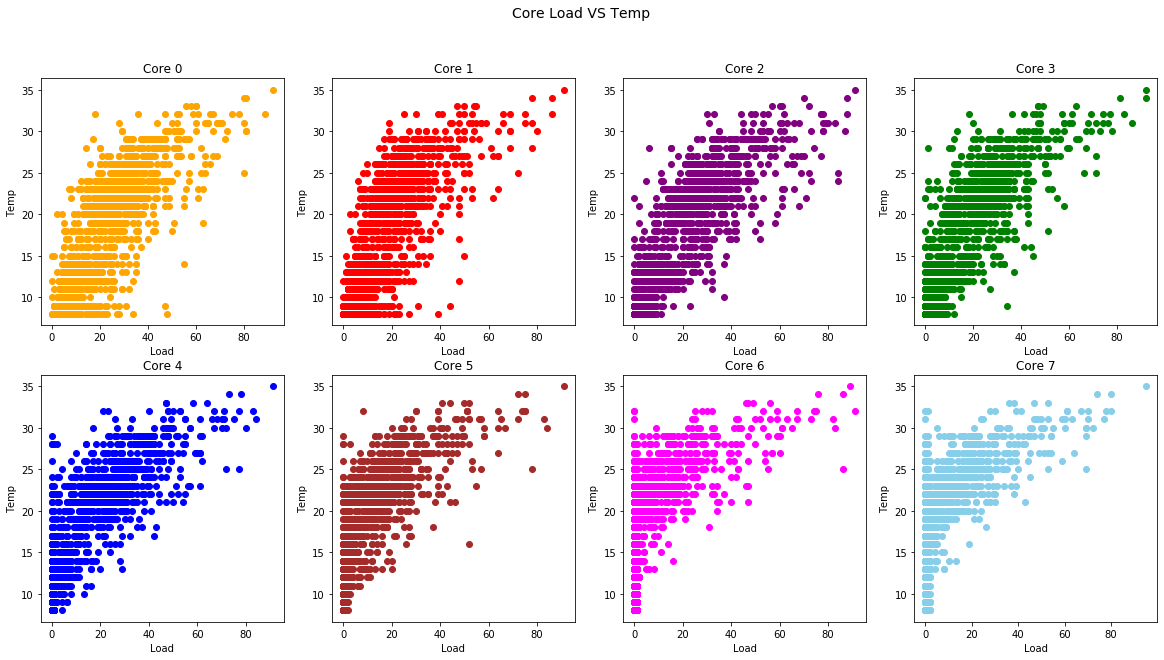

In [12]:
fig, axs = plt.subplots(2,4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Core Load VS Temp',fontsize=14)
axs[0, 0].scatter(df['Core 0 Load'],df['Core 0 Temp'],color='orange')
axs[0, 0].set_title('Core 0')
axs[0, 1].scatter(df['Core 1 Load'],df['Core 1 Temp'],color='red')
axs[0, 1].set_title('Core 1')
axs[0, 2].scatter(df['Core 2 Load'],df['Core 2 Temp'],color='purple')
axs[0, 2].set_title('Core 2')
axs[0, 3].scatter(df['Core 3 Load'],df['Core 3 Temp'],color='green')
axs[0, 3].set_title('Core 3')

axs[1, 0].scatter(df['Core 4 Load'],df['Core 4 Temp'],color='blue')
axs[1, 0].set_title('Core 4')
axs[1, 1].scatter(df['Core 5 Load'],df['Core 5 Temp'],color='brown')
axs[1, 1].set_title('Core 5')
axs[1, 2].scatter(df['Core 6 Load'],df['Core 6 Temp'],color='fuchsia')
axs[1, 2].set_title('Core 6')
axs[1, 3].scatter(df['Core 7 Load'],df['Core 7 Temp'],color='skyblue')
axs[1, 3].set_title('Core 7')
for ax in axs.flat:
    ax.set(xlabel='Load', ylabel='Temp')

Text(0, 0.5, 'Temp')

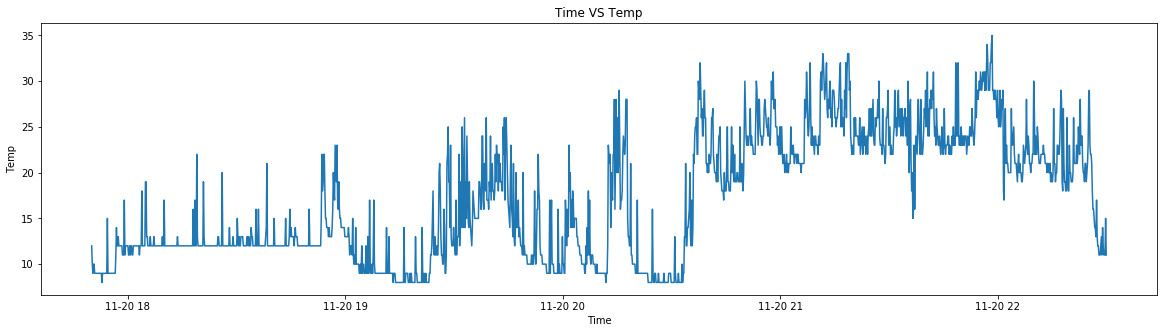

In [19]:
# Line graph of temps right before and after applying new thermalpaste
#start = 61080
start = 0
end = len(df)
fig= plt.figure(figsize=(20,5))
plt.title("Time VS Temp")
#plt.xticks(np.arange(0, len(df), step=500))
plt.plot(df['Time'][start:end],df['Core 0 Temp'][start:end])
#plt.xaxis_date()
plt.xlabel("Time")
plt.ylabel("Temp")


Text(0.5, 0, 'Load')

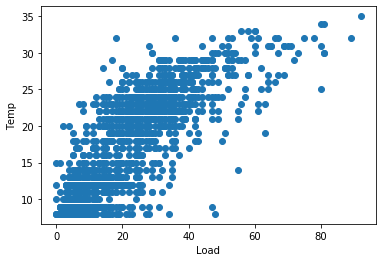

In [20]:
# all timeframe within this file
start = 0
end = len(df)
plt.scatter(df['Core 0 Load'][start:end],df['Core 0 Temp'][start:end])
plt.ylabel("Temp")
plt.xlabel("Load")

Text(0.5, 0, 'Load')

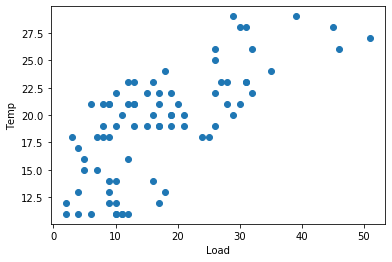

In [21]:
# last few hours of this file
#start = 61050
start = 1600
end = len(df)
plt.scatter(df['Core 1 Load'][start:end],df['Core 1 Temp'][start:end])
plt.ylabel("Temp")
plt.xlabel("Load")

In [22]:
start = 0
end = len(df)-1
minTemp = df['Core 0 Temp'][start:end].min()
meanTemp = df['Core 0 Temp'][start:end].mean()
maxTemp = df['Core 0 Temp'][start:end].max()

print("Min temperature of core 0 after before new thermal paste is: {}°C".format(minTemp))
print("Mean temperature of core 0 after before new thermal paste is: {:.2f}°C".format(meanTemp))
print("Max temperature of core 0 after before new thermal paste is: {}°C".format(maxTemp))

Min temperature of core 0 after before new thermal paste is: 8°C
Mean temperature of core 0 after before new thermal paste is: 17.09°C
Max temperature of core 0 after before new thermal paste is: 35°C


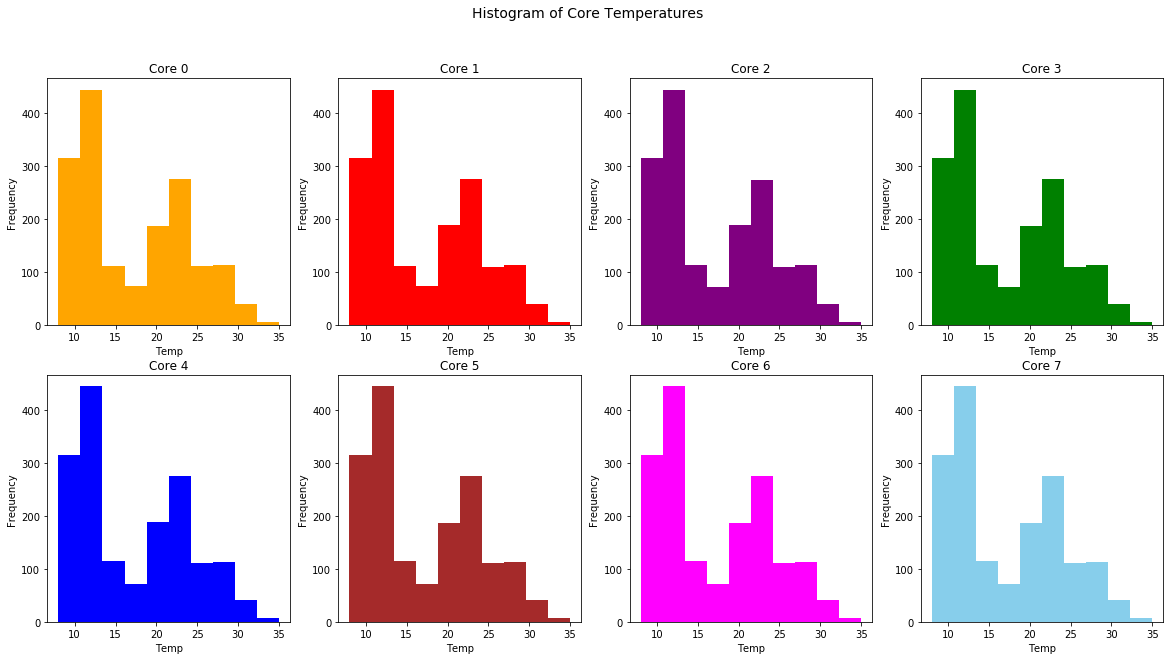

In [23]:
start = 0
end = len(df)
#plt.hist(df['Core 0 Temp'][start:end])

fig, axs = plt.subplots(2,4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Histogram of Core Temperatures',fontsize=14)

axs[0, 0].hist(df['Core 0 Temp'][start:end],color='orange')
axs[0, 0].set_title('Core 0')
axs[0, 1].hist(df['Core 1 Temp'][start:end],color='red')
axs[0, 1].set_title('Core 1')
axs[0, 2].hist(df['Core 2 Temp'][start:end],color='purple')
axs[0, 2].set_title('Core 2')
axs[0, 3].hist(df['Core 3 Temp'][start:end],color='green')
axs[0, 3].set_title('Core 3')

axs[1, 0].hist(df['Core 4 Temp'][start:end],color='blue')
axs[1, 0].set_title('Core 4')
axs[1, 1].hist(df['Core 5 Temp'][start:end],color='brown')
axs[1, 1].set_title('Core 5')
axs[1, 2].hist(df['Core 6 Temp'][start:end],color='fuchsia')
axs[1, 2].set_title('Core 6')
axs[1, 3].hist(df['Core 6 Temp'][start:end],color='skyblue')
axs[1, 3].set_title('Core 7')
for ax in axs.flat:
    ax.set(xlabel='Temp', ylabel='Frequency')

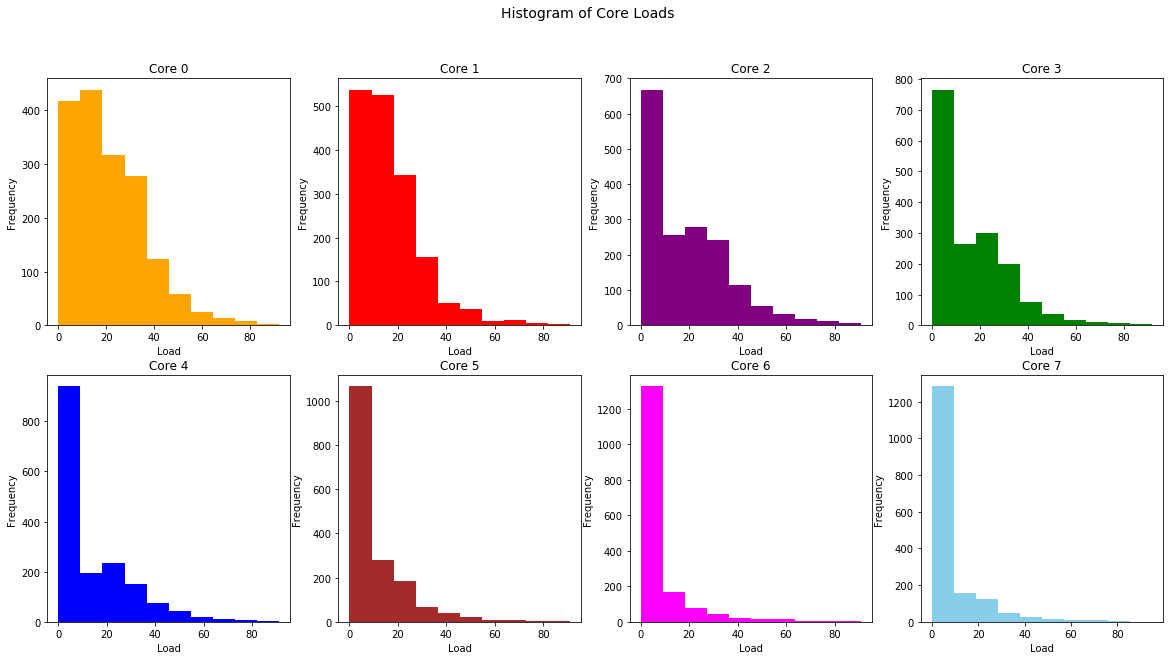

In [18]:
start = 0
end = len(df)

fig, axs = plt.subplots(2,4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Histogram of Core Loads',fontsize=14)

axs[0, 0].hist(df['Core 0 Load'][start:end],color='orange')
axs[0, 0].set_title('Core 0')
axs[0, 1].hist(df['Core 1 Load'][start:end],color='red')
axs[0, 1].set_title('Core 1')
axs[0, 2].hist(df['Core 2 Load'][start:end],color='purple')
axs[0, 2].set_title('Core 2')
axs[0, 3].hist(df['Core 3 Load'][start:end],color='green')
axs[0, 3].set_title('Core 3')

axs[1, 0].hist(df['Core 4 Load'][start:end],color='blue')
axs[1, 0].set_title('Core 4')
axs[1, 1].hist(df['Core 5 Load'][start:end],color='brown')
axs[1, 1].set_title('Core 5')
axs[1, 2].hist(df['Core 6 Load'][start:end],color='fuchsia')
axs[1, 2].set_title('Core 6')
axs[1, 3].hist(df['Core 7 Load'][start:end],color='skyblue')
axs[1, 3].set_title('Core 7')
for ax in axs.flat:
    ax.set(xlabel='Load', ylabel='Frequency')